# Support Vector Machine (SVM) - linear and non - linerar SVM classification

# 1. Linear classification - breast cancer recognition

**Data preparation - breast cancer wisconsin (diagnostic) dataset**

In [1]:
from sklearn import datasets

In [2]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
df_data_breast_cancer = data_breast_cancer.frame
df_data_breast_cancer.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [4]:
from sklearn.model_selection import train_test_split
X_bc = df_data_breast_cancer.iloc[:,:-1]
y_bc = df_data_breast_cancer['target']
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.2, shuffle = True) 

**We will train an SVM model to classify new cases of WDBC into Malignant Tumors and Benign Tumors.**

In [5]:
X_bc_train = X_bc_train[["mean area", "mean smoothness"]]
X_bc_test = X_bc_test[["mean area", "mean smoothness"]]

**Firstly, we decide to train our model without scaling the attributes, which will result in a low model accuracy, as SVM models require us to scale the attributes to similar ranges in order to be able to provide us with accurate classification**

In [6]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
    ])
svm_clf.fit(X_bc_train, y_bc_train)

/home/ppaczek04/miniconda3/envs/um_env/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('linear_svc', LinearSVC(C=1, loss='hinge'))])

**We can see that the model's accuracy is relatively low due to the lack of prior feature scaling.**

In [7]:
accuracy_bc_train = svm_clf.score(X_bc_train, y_bc_train)
accuracy_bc_test = svm_clf.score(X_bc_test, y_bc_test)
print(f'train set accuracy: {accuracy_bc_train}')
print(f'test set accuracy: {accuracy_bc_test}')

train set accuracy: 0.5318681318681319
test set accuracy: 0.5614035087719298


**Now we will use StandardScaler class in order to scale attributes to similar ranges**

In [8]:
svm_clf_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
                             ])
svm_clf_scaled.fit(X_bc_train, y_bc_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

**Now thanks to the scaling, accuracy score of our model is way higher (in the neighbourhood of 0.90)**

In [9]:
accuracy_bc_scaled_train = svm_clf_scaled.score(X_bc_train, y_bc_train)
accuracy_bc_scaled_test = svm_clf_scaled.score(X_bc_test, y_bc_test)
print(f'train scaled accuracy: {accuracy_bc_scaled_train}')
print(f'test scaled accuracy: {accuracy_bc_scaled_test}')

train scaled accuracy: 0.8879120879120879
test scaled accuracy: 0.9298245614035088


In [10]:
accuracy_score_list = [accuracy_bc_train, accuracy_bc_test, accuracy_bc_scaled_train, accuracy_bc_scaled_test]
import pickle
with open("bc_acc.pkl", "wb") as f:
    pickle.dump(accuracy_score_list, f)

**We created a model that classifies cancer cases as either Malignant or Benign with the accuracy of 90% thanks to the usage of LinearSVC model and attribute scaling.**

# 2. Linear classification - Iris Virginica recognition

**Data preparation - classic Iris plants dataset**

In [11]:
data_iris = datasets.load_iris(as_frame=True)
print(data_iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [12]:
df_data_iris = data_iris.frame
df_data_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [13]:
from sklearn.model_selection import train_test_split
X_ir = df_data_iris.iloc[:,:-1]
y_ir = df_data_iris['target']
y_ir = (y_ir == 2).astype(int)
X_ir_train, X_ir_test, y_ir_train, y_ir_test = train_test_split(X_ir, y_ir, test_size=0.2, shuffle = True) 

**We will train SVM model to classify new cases of iris plants - whether they belong to Iris-virginica species or other species. In this dataset there are 3 types of Iris species:**
- 0 -> setosa   
- 1 -> versicolor  
- 2 -> virginica

**SVM model is a binary classificator which means it decides whether sample belongs to one class or another. Thus, later on we transform label column (target column) from inicating whether a plant is setosa/versicolor/virginica to indicating:** 
- 0 -> others (setosa or versicolor)
- 1 -> virginica

**This allows us to train our model to recognize whether a sample represents the Virginica species.**

In [14]:
X_ir_train = X_ir_train[["petal length (cm)", "petal width (cm)"]]
X_ir_test = X_ir_test[["petal length (cm)", "petal width (cm)"]]
print(y_ir)


0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: target, Length: 150, dtype: int64


**Again, firstly without scaling the attributes**

In [15]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
                             ])
svm_clf.fit(X_ir_train, y_ir_train)

/home/ppaczek04/miniconda3/envs/um_env/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('linear_svc', LinearSVC(C=1, loss='hinge'))])

**no-scaling accuracy**

In [16]:
accuracy_ir_train = svm_clf.score(X_ir_train, y_ir_train)
accuracy_ir_test = svm_clf.score(X_ir_test, y_ir_test)
print(f'train set accuracy: {accuracy_ir_train}')
print(f'test set accuracy: {accuracy_ir_test}')

train set accuracy: 0.9583333333333334
test set accuracy: 1.0


**SVM classification visualisation below**

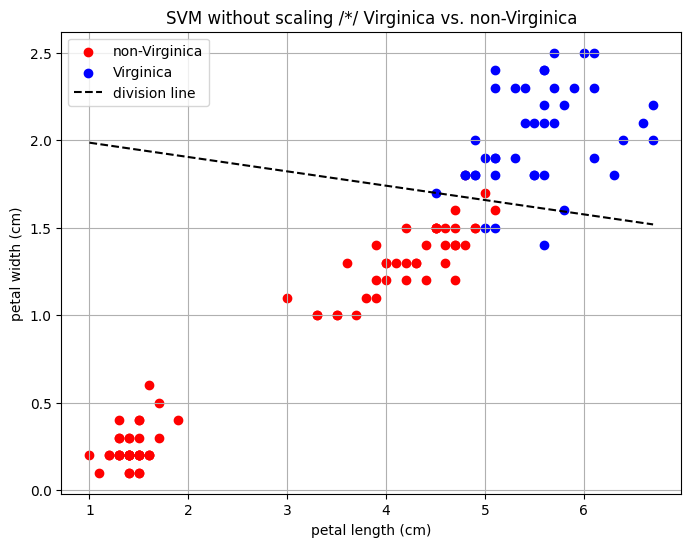

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# visualising data from dataset
plt.figure(figsize=(8,6))

# binary classification
class_0 = y_ir_train == 0
class_1 = y_ir_train == 1

plt.scatter(X_ir_train.loc[class_0, X_ir_train.columns[0]],
            X_ir_train.loc[class_0, X_ir_train.columns[1]],
            color='red', label='non-Virginica')

plt.scatter(X_ir_train.loc[class_1, X_ir_train.columns[0]],
            X_ir_train.loc[class_1, X_ir_train.columns[1]],
            color='blue', label='Virginica')

# parameters of y = ax + b division line
w = svm_clf.named_steps["linear_svc"].coef_[0]
b = svm_clf.named_steps["linear_svc"].intercept_[0]

# transformation to  y = -(w1/w2)x - (b/w2)
x_vals = np.linspace(X_ir_train.iloc[:, 0].min(), X_ir_train.iloc[:, 0].max(), 100)
y_vals = -(w[0] / w[1]) * x_vals - (b / w[1])

plt.plot(x_vals, y_vals, 'k--', label='division line')

# Description of axis/graph
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.title("SVM without scaling /*/ Virginica vs. non-Virginica")
plt.legend()
plt.grid(True)
plt.show()

**And now with scaling the attributes first**

In [18]:
svm_clf_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
                             ])
svm_clf_scaled.fit(X_ir_train, y_ir_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

**accuracy score of the model with beforehand scaling**

In [20]:
accuracy_ir_scaled_train = svm_clf_scaled.score(X_ir_train, y_ir_train)
accuracy_ir_scaled_test = svm_clf_scaled.score(X_ir_test, y_ir_test)
print(f'train scaled set accuracy: {accuracy_ir_scaled_train}')
print(f'test scaled set accuracy: {accuracy_ir_scaled_test}')

accuracy_score_list = [accuracy_ir_train, accuracy_ir_test, accuracy_ir_scaled_train, accuracy_ir_scaled_test]
import pickle

with open("iris_acc.pkl", "wb") as f:
    pickle.dump(accuracy_score_list, f)

train scaled set accuracy: 0.9416666666666667
test scaled set accuracy: 1.0


**SVM classification visualisation below**

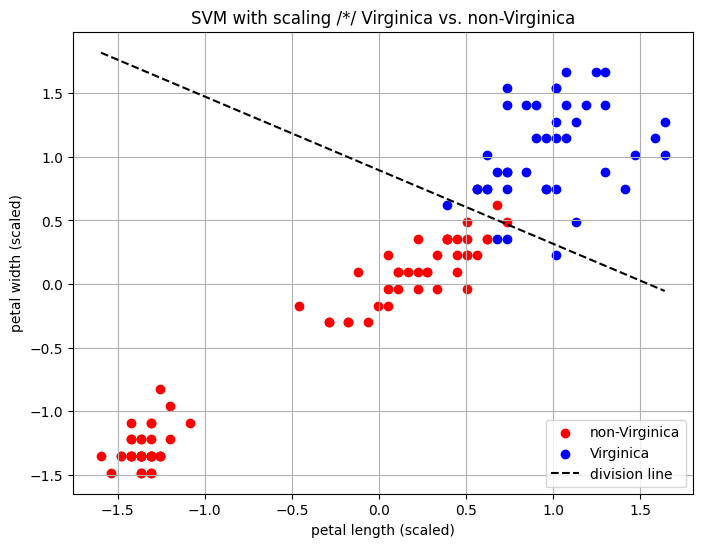

In [19]:
import pandas as pd

# scaling the data manually (in order to have them scaled on visualisation)
scaler = svm_clf_scaled.named_steps["scaler"]
X_ir_train_scaled = pd.DataFrame(
    scaler.transform(X_ir_train),
    columns=X_ir_train.columns,
    index=X_ir_train.index  # zachowaj index dla maski y
)

# binary classification
class_0 = y_ir_train == 0
class_1 = y_ir_train == 1

# visualising data from dataset
plt.figure(figsize=(8,6))
plt.scatter(X_ir_train_scaled.loc[class_0, "petal length (cm)"],
            X_ir_train_scaled.loc[class_0, "petal width (cm)"],
            color='red', label='non-Virginica')

plt.scatter(X_ir_train_scaled.loc[class_1, "petal length (cm)"],
            X_ir_train_scaled.loc[class_1, "petal width (cm)"],
            color='blue', label='Virginica')

# parameters of y = ax + b division line
w = svm_clf_scaled.named_steps["linear_svc"].coef_[0]
b = svm_clf_scaled.named_steps["linear_svc"].intercept_[0]

x_vals = np.linspace(X_ir_train_scaled.iloc[:, 0].min(), X_ir_train_scaled.iloc[:, 0].max(), 100)
y_vals = -(w[0] / w[1]) * x_vals - (b / w[1])

plt.plot(x_vals, y_vals, 'k--', label='division line')

# Description of axis/graph
plt.xlabel("petal length (scaled)")
plt.ylabel("petal width (scaled)")
plt.title("SVM with scaling /*/ Virginica vs. non-Virginica")
plt.legend()
plt.grid(True)
plt.show()


**In this case, accuracy of the model with scaling is lower than without scaling, why is that? It's likely that petal length and petal width are naturally well-corelated and have similar range, so forcing scalling might slightly lower the model accuracy. Nevertheless, often occuring increase in model accuracy makes it worth testing/checking if scalling will help, despite some cases when it doesnt change anything.**

# BONUS: Linear regression with SVM models (SVR, LinearSVR)

**Now we will test the ability of SVR models (counterpart od SVM models but used for regression) for regression**

<Axes: xlabel='x', ylabel='y'>

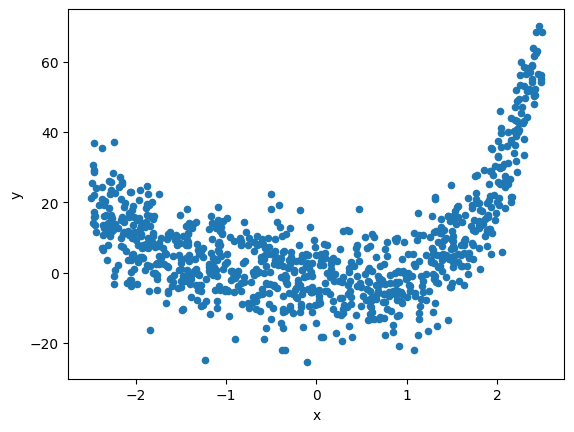

In [21]:
import numpy as np
import pandas as pd
size = 900
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')


In [22]:
print(X.shape)
X = X.reshape(-1,1) # -1 meaning as many as there is [in this example (300,1)]
y = y.reshape(-1,1) # -1 meaning as many as there is [in this example (300,1)]
print(X.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(900,)
(900, 1)
(720, 1) (720, 1)
(180, 1) (180, 1)


**We train LinearSVR model with data transformed into fourth power by using PolynomialFeautres**

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR

svm_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=4)),
    #('scaler', StandardScaler()),
    ('lin_svr', LinearSVR())
])

svm_reg.fit(X_train, y_train)

y_train_pred = svm_reg.predict(X_train)
y_test_pred = svm_reg.predict(X_test)
    

/home/ppaczek04/miniconda3/envs/um_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ppaczek04/miniconda3/envs/um_env/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**We calculate Mean Squarred Error (MSE) as a measure of accuracy of our model**

In [24]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
print(f'Training Mean Squared Error (MSE): {train_mse}')
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Testing Mean Squared Error (MSE): {test_mse}')

Training Mean Squared Error (MSE): 62.24230775603816
Testing Mean Squared Error (MSE): 59.23481821289313


**Now we will use SVR model instead of LinearSVR model (Note: LinearSVR/LinearSVC scales linearly with the size of the training set, while SVR/SVC slows down significantly as the dataset grows).**

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

svm_poly_reg = Pipeline([
    #('poly', PolynomialFeatures(degree=4)), # not needed
    # ('scaler', StandardScaler()), # not necessary elo
    ('lin_svr', SVR(kernel="poly", degree=4))
])

svm_poly_reg.fit(X_train, y_train)

y_train_pred = svm_poly_reg.predict(X_train)
y_test_pred = svm_poly_reg.predict(X_test)

/home/ppaczek04/miniconda3/envs/um_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**The reason why SVR has a higher mean squared error (MSE) than LinearSVR is due to how the models are applied to the data. In this task, the target variable is generated using a 4th-degree polynomial function. LinearSVR is used together with polynomial feature expansion (degree 4), which means the model is able to perfectly match the structure of the data. As a result, LinearSVR achieves low MSE and very accurate predictions.**

**On the other hand, SVR by default uses the RBF (radial basis function) kernel, which does not assume any specific structure like a polynomial. This makes the model less suited for fitting a function that clearly follows a polynomial pattern. Additionally, the default hyperparameters of SVR may cause either overfitting or underfitting, depending on the dataset. This leads to worse generalization and a higher MSE.**

**To improve the performance of SVR, a polynomial kernel with degree 4 should be used, and hyperparameters like C, epsilon, and coef0 should be optimized using grid search.**

In [26]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
print(f'Training Mean Squared Error (MSE): {train_mse}')
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Testing Mean Squared Error (MSE): {test_mse}')

Training Mean Squared Error (MSE): 113.00304649312562
Testing Mean Squared Error (MSE): 103.05154728424655


**visualisation of the predictions of both models below**

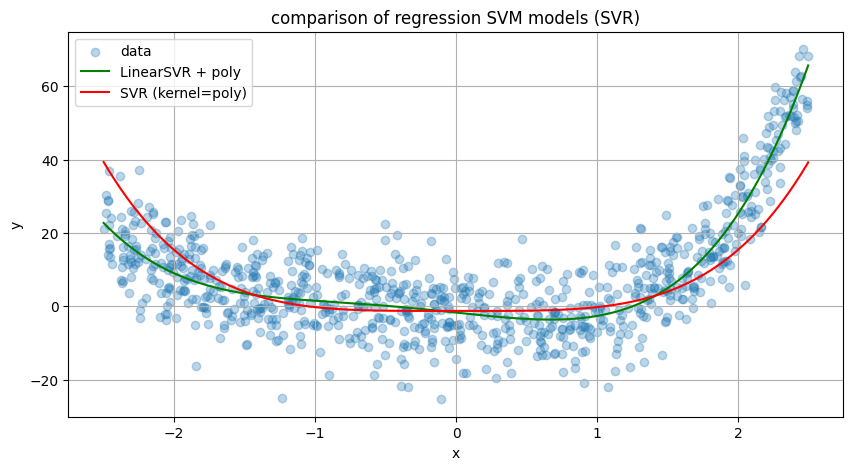

In [27]:
import matplotlib.pyplot as plt

x_line = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_line1 = svm_reg.predict(x_line)
y_line2 = svm_poly_reg.predict(x_line)

plt.figure(figsize=(10,5))
plt.scatter(X, y, alpha=0.3, label="data")
plt.plot(x_line, y_line1, label="LinearSVR + poly", color="green")
plt.plot(x_line, y_line2, label="SVR (kernel=poly)", color="red")
plt.legend()
plt.title("comparison of regression SVM models (SVR)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

**Now we will use GridSearch method to find parameters' set that provides best accuracy**

In [28]:
from sklearn.model_selection import GridSearchCV

svm_reg_grid = SVR()

param_grid = {
"C" : [0.1, 1, 10],
"coef0" : [0.1, 1, 10]
}
search = GridSearchCV(svm_reg_grid, param_grid, scoring="neg_mean_squared_error", n_jobs=-1)
search.fit(X, y)
print(f"Cross-validated accuracy = {search.best_score_}")
print(search.best_params_)


/home/ppaczek04/miniconda3/envs/um_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ppaczek04/miniconda3/envs/um_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ppaczek04/miniconda3/envs/um_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ppaczek04/miniconda3/envs/um_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A 

Cross-validated accuracy = -65.1041755583912
{'C': 10, 'coef0': 0.1}


/home/ppaczek04/miniconda3/envs/um_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ppaczek04/miniconda3/envs/um_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ppaczek04/miniconda3/envs/um_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**We use the best params to train our SVR model once again, and as a reuslt we get much better MSE for our SVR model**

In [29]:
svm_reg_grid_modified = SVR(C = search.best_params_["C"], coef0 = search.best_params_["coef0"] )

svm_reg_grid_modified.fit(X_train, y_train)

y_train_pred = svm_reg.predict(X_train)
y_test_pred = svm_reg.predict(X_test)

from sklearn.metrics import mean_squared_error

svrGrid_train_mse = mean_squared_error(y_train, y_train_pred)
print(f'Training Mean Squared Error (MSE): {svrGrid_train_mse}')
svrGrid_test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Testing Mean Squared Error (MSE): {svrGrid_test_mse}')

Training Mean Squared Error (MSE): 62.24230775603816
Testing Mean Squared Error (MSE): 59.23481821289313


/home/ppaczek04/miniconda3/envs/um_env/lib/python3.11/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**As you can see, SVM models which try to find best division line can be used to perform linear and non-linear regression. These models use different hyperparameters which can be manipulated in order to achieve better results with our data.**

In [30]:
import pickle

accuracy_score_list = [accuracy_bc_train, accuracy_bc_test, svrGrid_train_mse, svrGrid_test_mse]

with open("reg_mse.pkl", "wb") as f:
    pickle.dump(accuracy_score_list, f)